# Plot Fisher information

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

import madminer.core
from madminer.plotting import plot_fisher_information_contours_2d


In [14]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [15]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [16]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'
model_dir = base_dir + 'data/models/wgamma_sys/'
result_dir = base_dir + 'data/results/wgamma_sys/'

## Load Fisher information results

In [35]:
def load_data(ml_prefix = '', profiled=True):
    profile_prefix = 'profiled_' if profiled else ''
    
    # Ground truth
    infos  = [np.load(result_dir + profile_prefix + 'information_parton.npy'),
              np.load(result_dir + profile_prefix + 'information_rate_tight.npy')]
    covs   = [np.load(result_dir + profile_prefix + 'covariance_parton.npy'),
              np.load(result_dir + profile_prefix + 'covariance_rate_tight.npy')]
    labels = ['parton', 'xsec']
    colors = ['black', '0.5']
    lss    = ['-.', ':']
    
    # Histos
    histo_filenames = ['pta_phi', 'phi', 'deltaphi_lv', 'met', 'ptl', 'pta', 'deltaphi_la']
    histo_labels    = [r'$\varphi, p_{T,\gamma}$', r'$\varphi$', r'$\Delta\phi_{\ell\nu}$', 'MET', r'$p_{T,\ell}$', r'$p_{T,\gamma}$', r'$\Delta\phi_{\ell\gamma}$']
    histo_colors    = ['mediumblue', 'steelblue', 'dodgerblue', 'deepskyblue', 'cornflowerblue', 'b', 'midnightblue']
    histo_lss       = ['--']*10

    for hfilename, hlabel, hcolor, hls in zip(histo_filenames, histo_labels, histo_colors, histo_lss):
        infos.append(
            np.load(result_dir + profile_prefix + 'information_histo_{}_tight.npy'.format(hfilename))
        )
        covs.append(
            np.load(result_dir + profile_prefix + 'covariance_histo_{}_tight.npy'.format(hfilename))
        )
        labels.append(hlabel)
        colors.append(hcolor)
        lss.append(hls)
        
    # ML
    ml_filenames = ['full', 'full_infomode', 'minimal', 'full_tight', 'full_antitight', 'minimal_tight', 'phi_tight', 'pta_phi_tight']
    ml_labels    = ['full', 'full (I)', 'minimal', 'cuts', 'fail cuts', 'cuts min', r'$\varphi$', r'$\varphi, p_{T,\gamma}$']
    ml_colors    = ['#CC002E', 'firebrick', 'lightcoral', 'orangered', 'r', 'chocolate']*2
    ml_lss       = ['-', '-', '-', '-', '-.', '-', '--', '--']

    for hfilename, hlabel, hcolor, hls in zip(ml_filenames, ml_labels, ml_colors, ml_lss):
        infos.append(
            np.load(result_dir + profile_prefix + 'information_{}{}.npy'.format(hfilename, ml_prefix))
        )
        covs.append(
            np.load(result_dir + profile_prefix + 'covariance_{}{}.npy'.format(hfilename, ml_prefix))
        )
        labels.append(hlabel)
        colors.append(hcolor)
        lss.append(hls)
        
    return infos, covs, labels, colors, lss


In [37]:
infos_profiled, covs_profiled, _, _, _ = load_data('', profiled=True)
infos, covs, labels, colors, lss = load_data('', profiled=False)

for i, (label, info, info_prof) in enumerate(zip(labels, infos, infos_profiled)):
    print(
        '{:2} {:10.10s}  I_00 = {:7.0f} (projected) / {:7.0f} (profiled)'.format(i, label, info[0,0], info_prof[0,0])
    )
    print(
        '               I_11 = {:7.0f} (projected) / {:7.0f} (profiled)'.format(info[1,1], info_prof[1,1])
    )
    

 0 parton      I_00 = 54848047 (projected) / 54387679 (profiled)
               I_11 = 57338462 (projected) / 56981102 (profiled)
 1 xsec        I_00 =       1 (projected) /       0 (profiled)
               I_11 =       3 (projected) /       0 (profiled)
 2 $\varphi,   I_00 = 5096994 (projected) / 5096091 (profiled)
               I_11 =   10697 (projected) /   10692 (profiled)
 3 $\varphi$   I_00 = 4597300 (projected) / 4596209 (profiled)
               I_11 =   10295 (projected) /   10293 (profiled)
 4 $\Delta\ph  I_00 = 4380675 (projected) / 4316863 (profiled)
               I_11 =     596 (projected) /     594 (profiled)
 5 MET         I_00 =    6938 (projected) /    6569 (profiled)
               I_11 =     946 (projected) /     940 (profiled)
 6 $p_{T,\ell  I_00 =   23940 (projected) /   22798 (profiled)
               I_11 =     872 (projected) /     866 (profiled)
 7 $p_{T,\gam  I_00 =     934 (projected) /     907 (profiled)
               I_11 =     921 (projected) /     917

In [7]:
i = 9
op = 0

print("{:.0f} +/- {:.0f}".format(
    infos[i][op,op] / 1000.,
    covs[i][op,op,op,op]**0.5 / 1000.
))

13960 +/- 168


## Plotting function

In [42]:
def make_plot(ml_prefix = '', indices=None, xmax=0.004):
    infos, covs, labels, colors, lss = load_data(ml_prefix, profiled=True)
    infos_projected, _, _, _, _ = load_data(ml_prefix, profiled=False)
    
    if indices is not None:
        infos = [infos[i] for i in indices]
        covs = [covs[i] for i in indices]
        labels = [labels[i] for i in indices]
        colors = [colors[i] for i in indices]
        lss = [lss[i] for i in indices]
        infos_projected = [infos_projected[i] for i in indices]
        
    infos_projected = [info[:2, :2] for info in infos_projected]

    fig = plot_fisher_information_contours_2d(
        fisher_information_matrices=infos,
        fisher_information_covariances=covs,
        contour_distance=1.,
        xrange=(-xmax,xmax),
        yrange=(-xmax,xmax),
        xlabel=r'$f_{WWW}$',
        ylabel=r'$f_{\tilde{W}WW}$',
        linestyles=lss + lss,
        linewidths=1.5,
        colors=colors + colors,
        alphas=1.,
        resolution=600,
        inline_labels=labels
    )
    
    return fig


## Plots

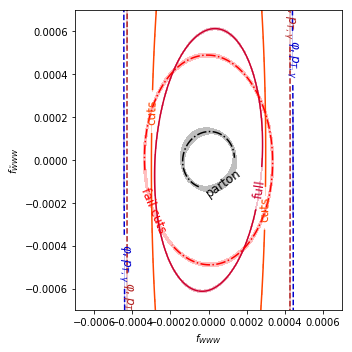

In [49]:
fig = make_plot('', xmax=0.0007, indices=[0,2,9,12,13,16])

plt.savefig("../../figures/wgamma/information_wgamma_multivariate.pdf")

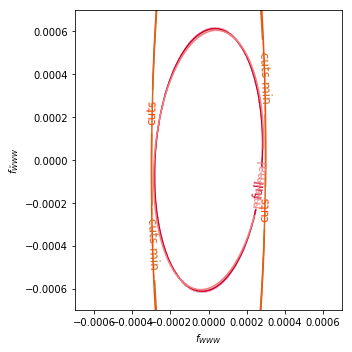

In [48]:
fig = make_plot('', xmax=0.0007, indices=[9,11,12,14])

plt.savefig("../../figures/wgamma/information_wgamma_minimal.pdf")

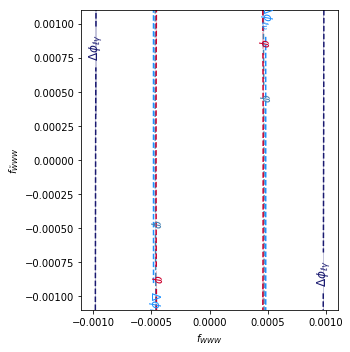

In [44]:
fig = make_plot('', xmax=0.0011, indices=[3,4,8,15])

plt.savefig("../../figures/wgamma/information_wgamma_angles.pdf")

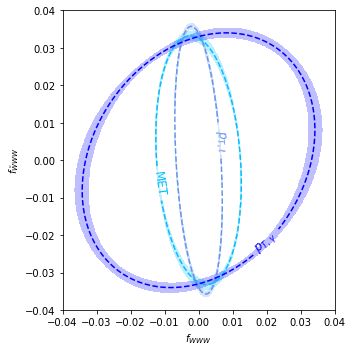

In [45]:
fig = make_plot('', xmax=0.04, indices=[5,6,7])

plt.savefig("../../figures/wgamma/information_wgamma_energies.pdf")

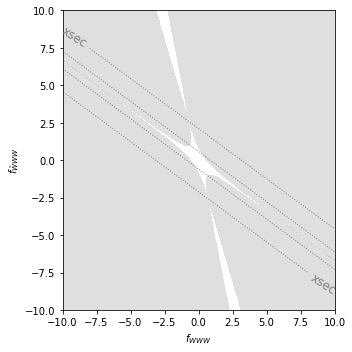

In [34]:
fig = make_plot('', xmax=10., indices=[1])

plt.savefig("../../figures/wgamma/information_wgamma_xsec.pdf")